In [ ]:
import pandas as pd
df = pd.read_excel("Base_random_forest.xlsx")

display (df)

,idade,genero,raca,estado onde mora,nivel de ensino,nivel,Tempo de experiência na área de dados (anos),IDH do Estado,Salario
0,31,Masculino,Branca,Minas Gerais (MG),Doutorado ou Phd,Sênior,3,0.774,Alto
1,30,Masculino,Branca,Espírito Santo (ES),Graduação/Bacharelado,Pleno,3,0.771,Baixo
2,37,Feminino,Amarela,São Paulo (SP),Graduação/Bacharelado,Júnior,1,0.806,Baixo
3,34,Masculino,Branca,Minas Gerais (MG),Doutorado ou Phd,Júnior,1,0.774,Baixo
4,30,Masculino,Branca,Rio de Janeiro (RJ),Estudante de Graduação,Pleno,1,0.762,Alto
...,...,...,...,...,...,...,...,...,...
3634,27,Feminino,Parda,Espírito Santo (ES),Graduação/Bacharelado,Pleno,3,0.771,Alto
3635,37,Masculino,Branca,Minas Gerais (MG),Pós-graduação,Sênior,5,0.774,Alto
3636,28,Masculino,Branca,São Paulo (SP),Graduação/Bacharelado,Júnior,1,0.806,Alto
3637,32,Masculino,Branca,Rio Grande do Norte (RN),Graduação/Bacharelado,Pleno,4,0.728,Alto


In [ ]:
print(df.columns.tolist())

['idade', 'genero', 'raca', 'estado onde mora', 'nivel de ensino', 'nivel', 'Tempo de experiência na área de dados (anos)', 'IDH do Estado ', 'Salario']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas (remover multi-índice)
df.columns = [col[1].strip() if isinstance(col, tuple) else col for col in df.columns]
df = df.drop("nivel", axis = 1)

# 3. Remover registros com salário nulo
df = df.dropna(subset=["Salario"])

# 4. Codificar variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Separar variáveis independentes (X) e dependente (y)
X = df.drop("Salario", axis=1)
y = df["Salario"]

display (df)

,idade,genero,raca,estado onde mora,nivel de ensino,Tempo de experiência na área de dados (anos),IDH do Estado,Salario
0,31,1,1,12,0,3,0.774,0
1,30,1,1,7,2,3,0.771,1
2,37,0,0,24,2,1,0.806,1
3,34,1,1,12,0,1,0.774,1
4,30,1,1,20,1,1,0.762,0
...,...,...,...,...,...,...,...,...
3634,27,0,4,7,2,3,0.771,0
3635,37,1,1,12,6,5,0.774,0
3636,28,1,1,24,2,1,0.806,0
3637,32,1,1,18,2,4,0.728,0


Acurácia do treino: 0.82
Acurácia do teste: 0.78

              precision    recall  f1-score   support

        Alto       0.71      0.73      0.72       141
       Baixo       0.83      0.81      0.82       223

    accuracy                           0.78       364
   macro avg       0.77      0.77      0.77       364
weighted avg       0.78      0.78      0.78       364



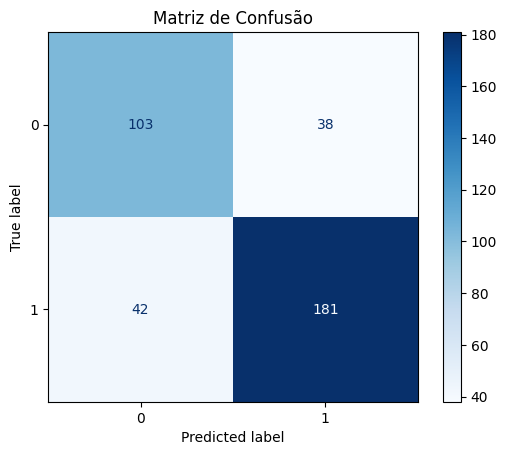

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas (remover multi-índice)
df.columns = [col[1].strip() if isinstance(col, tuple) else col for col in df.columns]
df = df.drop("nivel", axis = 1)

# 3. Remover registros com salário nulo
df = df.dropna(subset=["Salario"])

# 4. Codificar variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Separar variáveis independentes (X) e dependente (y)
X = df.drop("Salario", axis=1)
y = df["Salario"]

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 7. Treinar modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

# 8. Fazer previsões
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# 9. Calcular acurácia
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia do treino: {train_accuracy:.2f}")
print(f"Acurácia do teste: {test_accuracy:.2f}\n")

# 10. Classification report
print(classification_report(y_test, y_test_pred, target_names=["Alto", "Baixo"]))

# 11. Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()